In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv('../DataSet/cleaned_dataset/customers_cleaned.csv')
geolocation = pd.read_csv('../DataSet/cleaned_dataset/geolocation_cleaned.csv')
order_items = pd.read_csv('../DataSet/cleaned_dataset/order_items_cleaned.csv')
order_payments = pd.read_csv('../DataSet/cleaned_dataset/payments_cleaned.csv')
order_reviews = pd.read_csv('../DataSet/cleaned_dataset/reviews_cleaned.csv')
orders = pd.read_csv('../DataSet/cleaned_dataset/orders_cleaned.csv')
products = pd.read_csv('../DataSet/cleaned_dataset/products_cleaned.csv')
sellers = pd.read_csv('../DataSet/cleaned_dataset/sellers_cleaned.csv')
product_category = pd.read_csv('../DataSet/cleaned_dataset/product_category_name_cleaned.csv')

# year to year sales 

In [5]:
orders[['order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = orders[[
            'order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date'
        ]].apply(pd.to_datetime)

In [6]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month']=orders['order_purchase_timestamp'].dt.month_name()
orders['day']= orders['order_purchase_timestamp'].dt.day_name()


In [7]:

# Define mapping
weekday_map = {
    'Monday'   : 'Weekday',
    'Tuesday'  : 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday' : 'Weekday',
    'Friday'   : 'Weekday',
    'Saturday' : 'Weekend',
    'Sunday'   : 'Weekend'
}

# Apply mapping
orders['day_type'] = orders['day'].map(weekday_map)

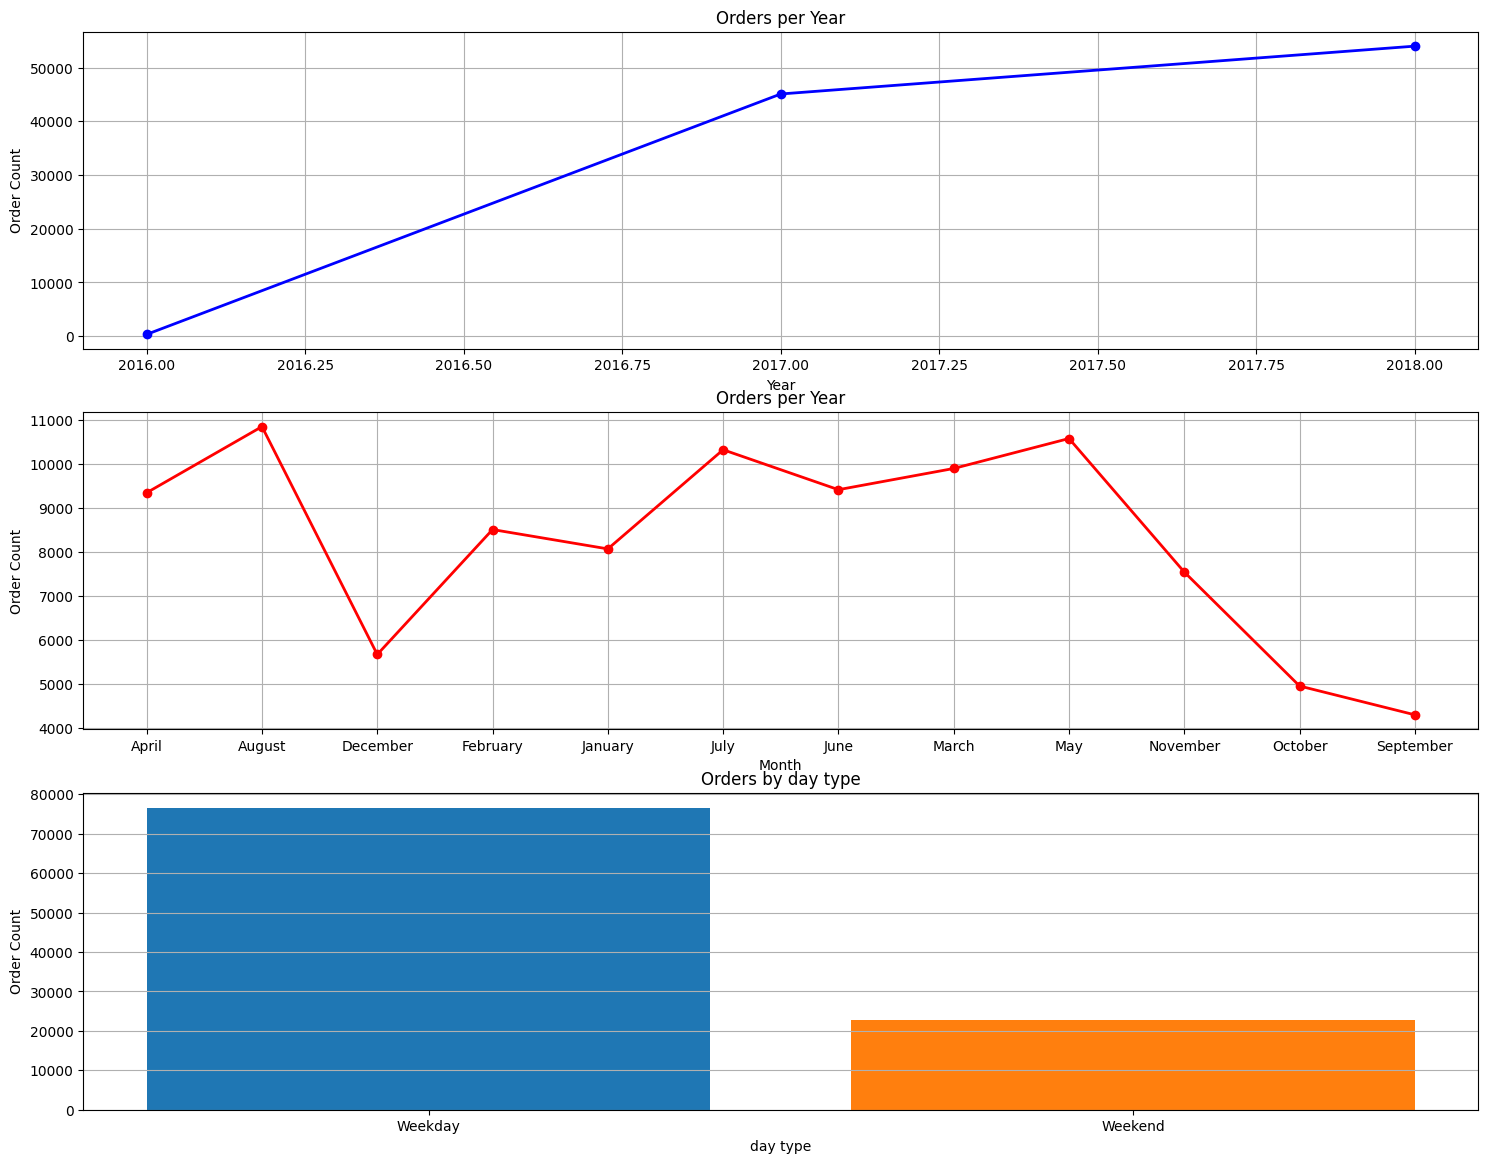

In [8]:
orders_per_year  = orders.groupby('year')['order_id'].count().reset_index()
orders_per_month = orders.groupby('month')['order_id'].count().reset_index()
orders_per_day   = orders.groupby('day_type')['order_id'].count().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(18,14))
axes[0].plot(orders_per_year['year'], orders_per_year['order_id'], marker='o', color='blue', linewidth=2)
axes[0].set_title('Orders per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Order Count')
axes[0].grid(True)

axes[1].plot(orders_per_month['month'], orders_per_month['order_id'], marker='o', color='red', linewidth=2)
axes[1].set_title('Orders per Year')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Order Count')
axes[1].grid(True)

axes[2].bar(orders_per_day['day_type'], orders_per_day['order_id'], color=['#1f77b4','#ff7f0e'])
axes[2].set_title('Orders by day type')
axes[2].set_xlabel('day type')
axes[2].set_ylabel('Order Count')
axes[2].grid(axis='y')






In [36]:
mdf= pd.merge(left=customers,right=orders,on='customer_id')

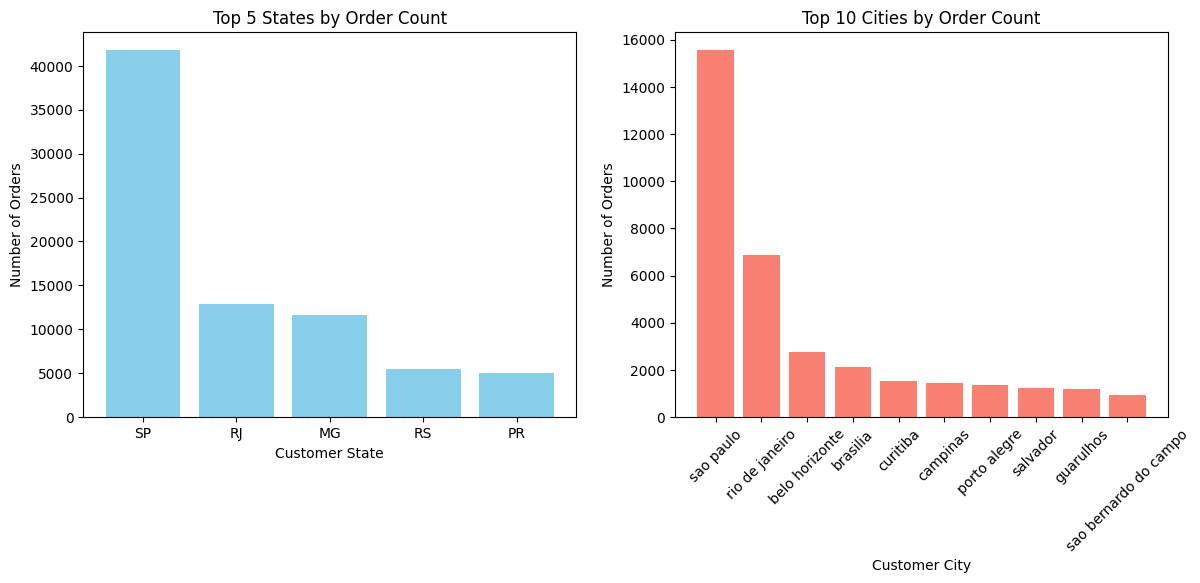

In [37]:
top5_states=mdf.groupby('customer_state')['order_id'].count().sort_values(ascending=False).iloc[:5]
top10_cities = mdf.groupby('customer_city')['order_id'].count().sort_values(ascending=False).iloc[:10]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(top5_states.index, top5_states.values, color='skyblue')
axes[0].set_title('Top 5 States by Order Count')
axes[0].set_xlabel('Customer State')
axes[0].set_ylabel('Number of Orders')

axes[1].bar(top10_cities.index, top10_cities.values, color='salmon')
axes[1].set_title('Top 10 Cities by Order Count')
axes[1].set_xlabel('Customer City')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)


In [47]:
mdf.groupby('customer_unique_id')['order_id'].count().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
ffeefd086fc667aaf6595c8fe3d22d54     1
ffef0ffa736c7b3d9af741611089729b     1
fff1afc79f6b5db1e235a4a6c30ceda7     1
fff1bdd5c5e37ca79dd74deeb91aa5b6     1
fff22793223fe80c97a8fd02ac5c6295     1
Name: order_id, Length: 96096, dtype: int64

In [39]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
